1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.


In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
N = 1000
X = np.zeros((N,3)) #colonne = x_i, righe = istanze di una stessa variabile
X[:,0] = np.random.randn(N)
X[:,1] = X[:,0] + 3*np.random.randn(N) #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
X[:,2] = 2*X[:,0] + X[:,1]
X = X.T #di default per la matrice delle covarianze si preferisce avere le variabili nelle righe e le istanze nelle colonne

#C = np.cov(X,rowvar=False)
C = np.cov(X)
l,V = np.linalg.eig(C)
C_by_hand = np.dot(X, X.T)/(N-1)
l_h,V_h = np.linalg.eig(C_by_hand)

U, spectrum, Vt = la.svd(X)
l_svd = spectrum**2/(N-1) #autovalori e autovettori saranno permutati in modo da restituire gli autovalori in ordine decrescente
V_svd = U
print("eigenvalues (eigendecomposition of np.cov(X)):",l)
print("eigenvalues (eigendecomposition of (X @ X.T)/(N-1)):",l_h)
print("eigenvalues (SVD):",l_svd)
print("\n")
print("eigenvectors (eigendecomposition of np.cov(X)):")
print(V)
print("eigenvectors (eigendecomposition of (X @ X.T)/(N-1)):")
print(V_h)
print("eigenvectors (SVD):")#a meno di permutazioni coincidono
print(V_svd)

#solo un autovalore differisce significativamente (15 odg circa), ma con ambo i metodi il risultato è un numero molto piccolo, prossimo a 0; forse visto che la soluzione esatta è 0 (x3 dipende da x2 e x1 in maniera deterministica-->covarianza nulla) i due algoritmi "se ne rendono conto" con precisioni differenti - anche perché mi sembra poco plausibile che un errore da parte mia riesca a dare gli stessi autovettori e gli autovalori tutti uguali tranne uno..! 

eigenvalues (eigendecomposition of np.cov(X)): [2.73875923e+01 7.19672194e-16 2.02904767e+00]
eigenvalues (eigendecomposition of (X @ X.T)/(N-1)): [2.73921473e+01 9.39704386e-16 2.02940419e+00]
eigenvalues (SVD): [2.73921473e+01 2.02940419e+00 5.38587327e-30]


eigenvectors (eigendecomposition of np.cov(X)):
[[-0.10647372 -0.81649658  0.56744751]
 [-0.58850471 -0.40824829 -0.69785066]
 [-0.80145215  0.40824829  0.43704437]]
eigenvectors (eigendecomposition of (X @ X.T)/(N-1)):
[[-0.10644521 -0.81649658  0.56745286]
 [-0.58853978 -0.40824829 -0.69782108]
 [-0.80143019  0.40824829  0.43708464]]
eigenvectors (SVD):
[[-0.10644521  0.56745286 -0.81649658]
 [-0.58853978 -0.69782108 -0.40824829]
 [-0.80143019  0.43708464  0.40824829]]


variability explained by the largest eig. (%): 93.10238126622905
variability explained by the 2 largest eig. (%): 99.99999999999999


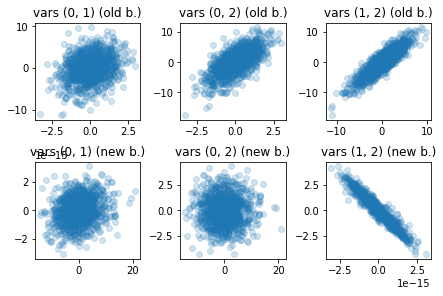

In [52]:
l_sorted = np.flip(np.sort(np.abs(l))) #stranamente np.sort non sembra avere il reverse che si ha con i dataframe
L = np.sum(l_sorted)
print("variability explained by the largest eig. (%):",100*l_sorted[0]/L)
print("variability explained by the 2 largest eig. (%):",100*(l_sorted[0]+l_sorted[1])/L) #questo non è proprio 100 ma se uso l_svd l'altro autovalore differisce di troppi ordini di grandezza perché il print di default non restituisca 100. Ovviamente anche se tecnicamente è 99.999...% (come si vede con l) il risultato è corretto e soprattutto ragionevole visto che x3 "non aggiunge niente di nuovo" rispetto a x1 e x2.

#nota: la matrice delle covarianze è simmetrica (palese dalla definizione con o senza media=0) e quindi per il teorema spettrale V è ortogonale. Questo si verifica facilmente con
#print(np.isclose(np.eye(3),V @ V.T)) 

#come ci aspettavamo per ridurre la dimensionalità del problema in modo "intelligente" bisogna fare fuori l'ultimo autovalore di l_svd (il minore in modulo) e con esso la terza dimensione, quella associata a x3.

#effettuo un cambio di base (matrice del cambio di base=inversa della matrice degli autovettori=trasposta) e nel plot tengo solo le prime due righe
Xp = np.dot(V.T, X) #ogni colonna della matrice risultante è una istanza delle 3 variabili x_i trasportata nella nuova base

#plot
from itertools import combinations
pairs = list(combinations(range(3),2))

fig,axes = plt.subplots(2,3,constrained_layout=True) #https://stackoverflow.com/a/51657238
#fig.tight_layout
for i,j in enumerate(pairs) :
    axes[0,i].scatter(X[j[0],:],X[j[1],:],alpha=0.2) #[0] e [1] si possono mettere anche dopo :]
    #axes[0,i].plot(V[j[0],j],V[j[1],j],"r-",lw=2)
    #axes[0,i].plot(V[j,j[0]],V[j,j[1]],"r-",lw=2)
    axes[0,i].set_title(f"vars {j} (old b.)")
    axes[1,i].scatter(Xp[j[0],:],Xp[j[1],:],alpha=0.2)
    axes[1,i].set_title(f"vars {j} (new b.)")

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [55]:
sigma = np.abs(np.random.randn(10)/50) #come deviazioni standard uso 10 valori generati da N(0,1) presi in modulo e scalati di 1/50. In questo modo le sigma saranno dell'ordine di 1/50 - coerentemente con le deviazioni standard dell'ordine dell'unità usate precedentemente ad esempio per x1

#per non mescolare variabili stavolta uso y anziché x
Y = np.zeros((13,N))
Y[:3,:] = X
Y[3:,:] = sigma.reshape((-1,1))*np.random.randn(10,N) #scalo la riga i (corrispondente alla variabile i) di sigma_i (prodotto elementwise)
C_y = np.cov(Y)
l_y,V_y = np.linalg.eig(C_y)

l_sorted_y = np.flip(np.sort(np.abs(l_y))) 
L_y = np.sum(l_sorted_y)
print("variability explained by the largest eig. (%):",100*l_sorted_y[0]/L_y)
print("variability explained by the 2 largest eig. (%):",100*(l_sorted_y[0]+l_sorted_y[1])/L_y) #decresce un filo ma resta quasi costante --> ragionevole!

variability explained by the largest eig. (%): 93.08087574858907
variability explained by the 2 largest eig. (%): 99.9769053598245


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera records the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 